MELHOR ROTA [Cord X, Cord Y]:

 [[0, 41], [117, 75], [133, 94], [109, 125], [191, 211], [325, 235], [383, 292], [280, 303]]

QUANTIDADE DE NÓS:  250


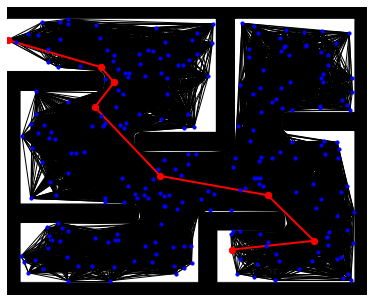

In [1]:
#ENTREGÁVEL 01 - ROBÓTICA
#JOHAN KEVIN - GABRIEL FORMIGA

#Largada: (9, 41)pxl
#Chegada: (280, 303)pxl

#Importando as bibliotecas
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import PIL
from bresenham import bresenham #Rasteirização de pixels
from matplotlib import pyplot
from matplotlib import image
from PIL import Image
import pickle 

#--------------------------------------------------------------------------------------

aux = Image.open("Grid_Inflado.png") #Abrindo imagem e atribuindo a aux

resolução = []                 #Lista que captura as dimensões
for x in aux.size:
    resolução.append(x)
largura, comprimento = resolução[1], resolução[0]

imagem = np.array(aux)     #Abrindo imagem em array

Grafo = nx.Graph()         #Criando grafo de mapeamento de vertices
GrafoDJ = nx.Graph()       #Criando Grafo de melhor caminho
MelhorRota = []            #Vetor de coordenadas de melhor rota
contadorVertices = 0       #Conta as vertices criadas no networkx
contador = 0               #Conta pixels pintados na imagem
d6 = 0                     #Escolha aleatoria de posição
pontos = 0                 #Quantidade de vertices(pontos) aleatórios criados
posição = {}               #Dicionario que guarda as coordenadas dos vertices (networkx)
PixelsPintados = {}        #Dicionario que guarda as coordenadas dos pixels pintados (imagem)
PosiçãoDJ = {}             #Dicionario que armazena os nós da melhor rota para plotar em destaque
gps = False                #Variável que confere se existe uma rota entre largada e chegada

#--------------------------------------------------------------------------------------

while gps == False: #Se não houver rota, executa novamente adicionando mais pontos
    
#Plotando vertices aleatórios na imagem
    while contador <= pontos:
        for i in range(largura):                                #Linha
            for j in range(comprimento):                        #Elemento de cada linha 
                d6 = random.randint(0,10000)
                if (imagem[i][j][0]) == 255:                    #Confere se o pixel é branco ou preto
                    if d6 == 3:                                 #Decide de pinta um vertice ou não
                        Grafo.add_node(contadorVertices)        #Add nós no grafo networkx
                        posição[contadorVertices] = [j, i]      #Guardar coordenadas do vertice

                        imagem[i][j][1] = 0                     #Muda a cor do pixel para vermelho
                        imagem[i][j][2] = 0                     #Muda a cor do pixel para vermelho

                        PixelsPintados[contador] = [j, i]       #Preenche diconario de pixels pintados

                        contador = contador + 1                 #Contagem de pixels Pintados
                        contadorVertices = contadorVertices + 1 #Contagem de vertices criados networkx
            if contador == pontos:                              #Garante a quantidade exata de pontos criados
                break
        if contador == pontos:                                  #Garante a quantidade exata de pontos criados
                break
#--------------------------------------------------------------------------------------

#Definindo pixels de largada
    imagem[41][0][1] = 0                                        #Muda cor do pixel (Na imagem)
    Grafo.add_node(contadorVertices)                            #Add vertice de largada

#Definindo pixels de chegada
    imagem[303][280][1] = 0                                     #Muda cor do pixel (Na imagem)
    Grafo.add_node(contadorVertices + 1)                        #Add vertice de chegada

    posição[contadorVertices] = [0, 41]                         #Add no dicionario de coordenadas
    posição[contadorVertices + 1] = [280, 303]                  #Add no dicionario de coordenadas
    PixelsPintados[contador] = [0, 41]                          #Add largada ao dic
    PixelsPintados[contador + 1] = [280, 303]                   #Add chegada ao dic
    
#--------------------------------------------------------------------------------------

#Detecção de colisão
    rota = []                                                   #Armazena o valor da trajetoria entre dois pixels
    x1, y1, x2, y2 = 0, 0, 0, 0

    for a in PixelsPintados:                                    #Percorre PixelsPintados (ponto de partida)

        x1 = PixelsPintados[a][0]
        y1 = PixelsPintados[a][1]

        for b in PixelsPintados:                                #Percorre PixelsPintados (Possivéis destinos)

            x2 = PixelsPintados[b][0]
            y2 = PixelsPintados[b][1]

            for c in list(bresenham(y1, x1, y2, x2)):           #Bresenham entre todos os pontos
                rota.append(c)     

            for d in range(1, len(rota)):                       #Percorre os pixels da trajetoria
                if d == (len(rota) - 1):                        #Checa se chegou ao final da trajetoria
                    Grafo.add_edge(a, b, weight=len(rota))      #Cria uma aresta 
                else:                                           #Checa se na trajetoria ocorre colisão (pixels pretos)
                    if imagem[rota[d][0]][rota[d][1]][0] == 0:  #Se ocorrer colisão, abandona a trajetoria
                        break
            rota.clear()                                        #Limpa a lista para uma nova análise  

#--------------------------------------------------------------------------------------

    labels = nx.get_edge_attributes(Grafo,'weight')             #Variavel que guarda o valor do peso das arestas
    
    gps = nx.has_path(Grafo, contadorVertices, contadorVertices + 1) #Checa se existe rota que conecta largada-chegada
    
    if gps == True:    
        MelhorCaminho = nx.dijkstra_path(Grafo, contadorVertices, contadorVertices + 1, 'weight')
        aux2 = 0
        for z in range(len(MelhorCaminho)):
            aux2 = MelhorCaminho[z]
            MelhorRota.append(posição[aux2])
        
        for p in range(len(MelhorCaminho)):
            GrafoDJ.add_node(p)
            PosiçãoDJ[p] = MelhorRota[p]
        
        for q in range(len(PosiçãoDJ)-1):
            GrafoDJ.add_edge(q, q+1)        
    else:
        pontos = pontos + 250 #Quantidade de pontos a serem add caso nao exista rota
    
dados = open('Coordenadas.txt', "wb")
pickle.dump(MelhorRota, dados, protocol=2)
dados.close()
#-------------------------------------------------------------------------------------

#PLOTS
nx.draw(Grafo, posição, node_color='b', node_size=10) #Grafo, posição, cor, tamanho
nx.draw(GrafoDJ, PosiçãoDJ, edge_color='r', node_color='r', node_size=40, width = 2)#Grafo de melhor caminho
resultado = Image.fromarray(imagem)  #Transforma o array em imagem novamente 
plt.imshow(resultado)
print("MELHOR ROTA [Cord X, Cord Y]:\n\n", MelhorRota)
print("\nQUANTIDADE DE NÓS: ", contador)